<a href="https://colab.research.google.com/github/EarthBet/Fusion-Filter/blob/main/Fusion%20Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions:

TLDR; Press Control + F9 then "Run anyway" then scroll to the bottom.

Control + F9 will run all the code. You can confirm this by clicking "Runtime" above. The first option you'll see is "Run all" with "Ctrl+F9" listed as its shortcut. Alternatively you can press "Runtime" above and then press "Run all". You will get the following warning.

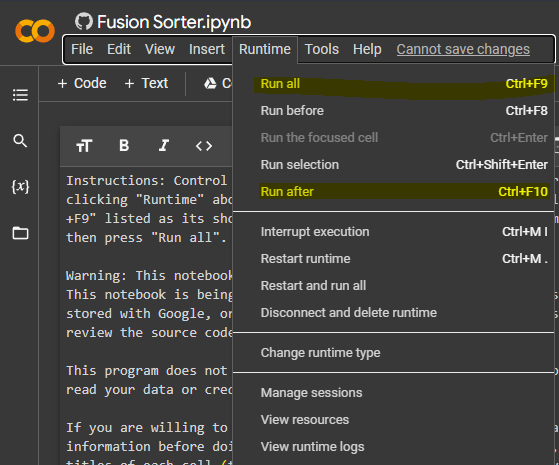

Warning: This notebook was not authored by Google
This notebook is being loaded from GitHub. It may request access to your data stored with Google, or read data and credentials from other sessions. Please review the source code before executing this notebook.

This program does not access your data, nor does it ask to do so. It does not read your data or credentials from other sessions.

If you are willing to to continue, press "Run anyway". If you want more information before doing so, you can continue reading this text, read the titles of each cell (the titled blocks), and/or view the code by pressing the "Show code" in blue inside of each cell.

The code should be simple enough for even novice programmers with no experience with either standard Python or Jupyter Notebook to realize I'm not installing malware onto your system or anything like that. I say should because I don't have a novice programmer on hand to ask.

The first cell temporarily installs Python packages necessary for the code to run on the server. They are not installed onto your machine. If you doubt me, look it up. The comments of wherever you learned about this (presumably Reddit) may also confirm this.

This does take a little while, but not too long. You won't need to reinstall it for the rest of the session, but if you press Control + F9 again it will attempt to reinstall before realizing that everything is already installed. It will take a little while, but not as long as before.

If you need to restart the program and don't want to wait for the server to realize everything is already installed, click the cell labeled "Importing packages, reading the csv file, setting global variables" then press Control + F10. If you check "Runtime" above, you'll see "Run after" with the shortcut "Ctrl+F10". You can check the earlier picture if you're struggling to find it. This runs the selected cell and all cells following it.

Once the program has been run, you can scroll to the bottom of the page and you'll see three buttons. Additionally, there are explanations for what each of the buttons do on top of them.

If you have any questions, notice any problems, or want to give suggestions, please message me on Reddit, GitHub, or Discord.

Reddit: u/PixelGMS, you can just DM me there, I'm not making a subreddit for this

Discord: https://discord.gg/P2t58eeADw, I don't accept DMs there from people who aren't sharing a Discord or friend with me, but my username there is pixelgms

GitHub: https://github.com/EarthBet/Fusion-Dex, on there I go by EarthBet but you can't DM people on there, at least as far as I know.

In [ ]:
#@title Installations (Everything is installed locally on the server running this, not on your machine. From my understanding, it needs to be reinstalled every time you leave and come back, though there may be a grace period where it stays installed.)
!pip install pandas
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.0 MB/s eta 0:00:00


In [143]:
#@title Importing packages, reading the csv file, setting global variables
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed
from IPython.display import clear_output, HTML
import math

df = pd.read_csv("https://raw.githubusercontent.com/EarthBet/Fusion-Dex/main/fusionDex.csv")#'fusionDex.csv')
filters = ["Head", "Body", "Either", "TypeOne", "TypeTwo", "MAX BASE STAT TOTAL", "MIN BASE STAT TOTAL", "MAX HP", "MIN HP", "MAX ATTACK", "MIN ATTACK", "MAX DEFENSE", "MIN DEFENSE", "MAX SPECIAL ATTACK", "MIN SPECIAL ATTACK", "MAX SPECIAL DEFENSE", "MIN SPECIAL DEFENSE", "MAX SPEED", "MIN SPEED", "ABILITY", "MIN WEIGHT", "MAX WEIGHT"]
sorting = ["INFORMAL DEX", "ASCENDING"]
pc = []
andor = 'AND'

In [144]:
#@title Beautification of the final results and also making sure no text inputs care about capitalization
def cap(a):
    return a.capitalize()

df['type1'] = df['type1'].apply(cap)
df['type2'] = df['type2'].apply(cap)

In [145]:
#@title Navigation Buttons
def gui(a):
    print("Do you want to select FILTERS, SORT the results, or VIEW the results? You'll be able to return here by pressing the RETURN button on any other page.")
    FILTERS = widgets.Button(
        description='FILTERS',
        disabled=False,
        button_style='success', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='FILTERS',
    )
    SORT = widgets.Button(
        description='SORT',
        disabled=False,
        button_style='success', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='SORT',
    )
    VIEW = widgets.Button(
        description='VIEW',
        disabled=False,
        button_style='success', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='VIEW',
    )
    FILTERS.on_click(filtered)
    SORT.on_click(sort)
    VIEW.on_click(view)
    display(FILTERS, SORT, VIEW)

In [146]:
#@title Reset function so you don't need to run all the code from scratch every time you want to change something.
def reset(a):
    print("Clearing...")
    global filters
    global sorting
    global df
    global pc
    filters = ["Head", "Body", "Either", "TypeOne", "TypeTwo", "MAX BASE STAT TOTAL", "MIN BASE STAT TOTAL", "MAX HP", "MIN HP", "MAX ATTACK", "MIN ATTACK", "MAX DEFENSE", "MIN DEFENSE", "MAX SPECIAL ATTACK", "MIN SPECIAL ATTACK", "MAX SPECIAL DEFENSE", "MIN SPECIAL DEFENSE", "MAX SPEED", "MIN SPEED", "ABILITY", "MIN WEIGHT", "MAX WEIGHT"]
    sorting = ["INFORMAL DEX", "ASCENDING"]
    pc = []
    df = pd.read_csv("https://raw.githubusercontent.com/EarthBet/Fusion-Dex/main/fusionDex.csv")#'fusionDex.csv')
    df['type1'] = df['type1'].apply(cap)
    df['type2'] = df['type2'].apply(cap)
    print("Done")
    clear(0)

In [147]:
#@title Filter Navigation Buttons and the Reset  button
def filtered(a):
    print("What do you want to view filters for? SPECIES, TYPING, STATS, ABILITIES, or WEIGHT? You can restore all filters to their default by pressing RESET.")

    SPECIES = widgets.Button(
        description='SPECIES',
        disabled=False,
        button_style='success',
        tooltip='SPECIES',
    )
    TYPING = widgets.Button(
        description='TYPING',
        disabled=False,
        button_style='success',
        tooltip='TYPING',
    )
    STATS = widgets.Button(
        description='STATS',
        disabled=False,
        button_style='success',
        tooltip='STATS',
    )
    ABILITIES = widgets.Button(
        description='ABILITIES',
        disabled=False,
        button_style='success',
        tooltip='ABILITIES',
    )
    WEIGHT = widgets.Button(
        description='WEIGHT',
        disabled=False,
        button_style='success',
        tooltip='WEIGHT',
    )
    RESET = widgets.Button(
        description='RESET',
        disabled=False,
        button_style='success',
        tooltip='RESET',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    SPECIES.on_click(pkmnFilter)
    TYPING.on_click(typeFilter)
    STATS.on_click(statFilter)
    ABILITIES.on_click(abilityFilter)
    WEIGHT.on_click(weightFilter)
    RESET.on_click(reset)
    RETURN.on_click(gui)
    display(SPECIES, TYPING, STATS, ABILITIES, WEIGHT, RESET, RETURN)

In [148]:
#@title Species Filter Buttons
def pkmnFilter(a):
    print("Do you want to set the HEAD Pokemon or set the BODY Pokemon? Or do you want to set a Pokemon that can be EITHER head or body?")
    print("Alternatively, do you want to view ANY Fusions that only include certain Pokemon?")
    HEAD = widgets.Button(
        description='HEAD',
        disabled=False,
        button_style='success',
        tooltip='HEAD',
    )
    BODY = widgets.Button(
        description='BODY',
        disabled=False,
        button_style='success',
        tooltip='BODY',
    )
    EITHER = widgets.Button(
        description='EITHER',
        disabled=False,
        button_style='success',
        tooltip='EITHER',
    )
    ANY = widgets.Button(
        description='ANY',
        disabled=False,
        button_style='success',
        tooltip='ANY',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    HEAD.on_click(setHead)
    BODY.on_click(setBody)
    EITHER.on_click(setEither)
    ANY.on_click(anyPC)
    RETURN.on_click(gui)
    display(HEAD, BODY, EITHER, ANY, RETURN)

In [149]:
#@title Head Species Filter
def submit(a, loc, value):
    global filters
    filters[loc] = value.capitalize()
def setHead(a):
    print("What Pokemon should be locked in as the head?")
    HEAD = widgets.Text(
        value='HEAD',
        placeholder='',
        description='HEAD',
        disabled=False
    )
    SUBMITB = widgets.Button(
        description='SUBMIT',
        disabled=False,
        button_style='success',
        tooltip='SUBMIT',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    SUBMITB.on_click(lambda b: submit(b, 0, HEAD.value))
    RETURN.on_click(gui)
    display(HEAD, SUBMITB, RETURN)

In [150]:
#@title Body Species Filter
def setBody(a):
    print("What Pokemon should be locked in as the body?")
    BODY = widgets.Text(
        value='BODY',
        placeholder='',
        description='BODY',
        disabled=False
    )
    SUBMITB = widgets.Button(
        description='SUBMIT',
        disabled=False,
        button_style='success',
        tooltip='SUBMIT',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    SUBMITB.on_click(lambda b: submit(b, 1, BODY.value))
    RETURN.on_click(gui)
    display(BODY, SUBMITB, RETURN)

In [151]:
#@title Species Filter, Either Head or Body
def setEither(a):
    print("What Pokemon do you want to view fusions of? This will erase any filters set for the head or body.")
    EITHER = widgets.Text(
        value='EITHER',
        placeholder='',
        description='EITHER',
        disabled=False
    )
    SUBMITB = widgets.Button(
        description='SUBMIT',
        disabled=False,
        button_style='success',
        tooltip='SUBMIT',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    SUBMITB.on_click(lambda b: submit(b, 2, EITHER.value))
    SUBMITB.on_click(lambda b: submit(b, 1, "Body"))
    SUBMITB.on_click(lambda b: submit(b, 0, "Head"))
    RETURN.on_click(gui)
    display(EITHER, SUBMITB, RETURN)

In [152]:
#@title Species Filter. If you press the ONLY button then all fusions in the results will have both a head and body from the Pokemon in the list. This is good for if you want to see all fusions you can make with the Pokemon in your PC or something like that. If you press the OR button then it lists all fusions where either the head or body are from the Pokemon in the list. This is the same as the EITHER option but with multiple Pokemon.
def pcSubmit(a, value):
    global pc
    value = value.split(", ")
    value = [i.capitalize() for i in value]
    pc.extend(value)
def printPC(a):
    global pc
    print("Pokemon: ", str(pc).replace('[', '').replace(']', '').replace('\'', ''))
def orand(a, value):
    global andor
    andor = value
def anyPC(a):
    print("Please input a list of all Pokemon you want to include.")
    print("Seperate all Pokemon names with a comma and a space.")
    print("Press PRINT to see a list of all the Pokemon you have listed. This includes those you listed in previous submits, unless you pressed the RESET button.")
    print("Press AND if you want to only view Pokemon where both the head and body are listed. Press OR if you want to view Pokemon where either the head or body are listed.")
    ANY = widgets.Textarea(
        value='ANY',
        placeholder='ANY',
        description='ANY',
        disabled=False
    )
    SUBMIT = widgets.Button(
        description='SUBMIT',
        disabled=False,
        button_style='success',
        tooltip='SUBMIT',
    )
    PRINT = widgets.Button(
        description='PRINT',
        disabled=False,
        button_style='success',
        tooltip='PRINT',
    )
    AND = widgets.Button(
        description='AND',
        disabled=False,
        button_style='success',
        tooltip='AND',
    )
    OR = widgets.Button(
        description='OR',
        disabled=False,
        button_style='success',
        tooltip='OR',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    SUBMIT.on_click(lambda b: pcSubmit(b, ANY.value))
    PRINT.on_click(printPC)
    RETURN.on_click(gui)
    AND.on_click(lambda b: orand(b, 'AND'))
    OR.on_click(lambda b: orand(b, 'OR'))
    display(ANY, SUBMIT, RETURN, AND, OR, PRINT)

In [153]:
#@title Type Filter
def typeFilter(a):
    print("What type do you want the Pokemon in the results to be? Leave as is if you are okay with any typing.")
    print("Types: Normal, Fire, Fighting, Water, Flying, Grass, Poison, Electric, Ground, Psychic, Rock, Ice, Bug, Dragon, Ghost, Dark, Steel, and Fairy")
    TYPE1 = widgets.Text(
        value='FIRST TYPE',
        placeholder='',
        description='FIRST TYPE',
        disabled=False
    )
    SUBMIT1 = widgets.Button(
        description='SUBMIT FIRST TYPE',
        disabled=False,
        button_style='success',
        tooltip='SUBMIT FIRST TYPE',
    )
    TYPE2 = widgets.Text(
        value='SECOND TYPE',
        placeholder='',
        description='SECOND TYPE',
        disabled=False
    )
    SUBMIT2 = widgets.Button(
        description='SUBMIT SECOND TYPE',
        disabled=False,
        button_style='success',
        tooltip='SUBMIT SECOND TYPE',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    SUBMIT1.on_click(lambda b: submit(b, 3, TYPE1.value))
    SUBMIT2.on_click(lambda b: submit(b, 4, TYPE2.value))
    RETURN.on_click(gui)
    display(TYPE1, SUBMIT1, TYPE2, SUBMIT2, RETURN)

In [154]:
#@title Stat Filters
def submitNum(a, loc, value):
    global filters
    filters[loc] = value
def statFilter(a):
    print("Each slider represents a stat, either their base stat total, their hp, their attack, their defense, their special attack, their special defense, or speed. Move the slider to set their minimum and maximum for each stat.")
    BASETOTAL = widgets.IntRangeSlider(
        value=[160, 725],
        min=160,
        max=725,
        step=5,
        description='BASE STAT',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
    )
    HP = widgets.IntRangeSlider(
        value=[0, 255],
        min=0,
        max=255,
        step=5,
        description='HP',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
    )
    ATTACK = widgets.IntRangeSlider(
        value=[5, 165],
        min=5,
        max=165,
        step=5,
        description='ATTACK',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
    )
    DEFENSE = widgets.IntRangeSlider(
        value=[5, 230],
        min=5,
        max=230,
        step=5,
        description='DEFENSE',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
    )
    SPECIALATTACK = widgets.IntRangeSlider(
        value=[10, 170],
        min=10,
        max=170,
        step=5,
        description='SPECIAL ATTACK',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
    )
    SPECIALDEFENSE = widgets.IntRangeSlider(
        value=[20, 230],
        min=20,
        max=230,
        step=5,
        description='SPECIAL DEFENSE',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
    )
    SPEED = widgets.IntRangeSlider(
        value=[5, 180],
        min=5,
        max=180,
        step=5,
        description='SPEED',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
    )
    SUBMIT = widgets.Button(
        description='SUBMIT',
        disabled=False,
        button_style='success',
        tooltip='SUBMIT SECOND TYPE',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    SUBMIT.on_click(lambda b: submitNum(b, 5, BASETOTAL.value[1]))
    SUBMIT.on_click(lambda b: submitNum(b, 6, BASETOTAL.value[0]))
    SUBMIT.on_click(lambda b: submitNum(b, 7, HP.value[1]))
    SUBMIT.on_click(lambda b: submitNum(b, 8, HP.value[0]))
    SUBMIT.on_click(lambda b: submitNum(b, 9, ATTACK.value[1]))
    SUBMIT.on_click(lambda b: submitNum(b, 10, ATTACK.value[0]))
    SUBMIT.on_click(lambda b: submitNum(b, 11, DEFENSE.value[1]))
    SUBMIT.on_click(lambda b: submitNum(b, 12, DEFENSE.value[0]))
    SUBMIT.on_click(lambda b: submitNum(b, 13, SPECIALATTACK.value[1]))
    SUBMIT.on_click(lambda b: submitNum(b, 14, SPECIALATTACK.value[0]))
    SUBMIT.on_click(lambda b: submitNum(b, 15, SPECIALDEFENSE.value[1]))
    SUBMIT.on_click(lambda b: submitNum(b, 16, SPECIALDEFENSE.value[0]))
    SUBMIT.on_click(lambda b: submitNum(b, 17, SPEED.value[1]))
    SUBMIT.on_click(lambda b: submitNum(b, 18, SPEED.value[0]))
    RETURN.on_click(gui)
    display(BASETOTAL, HP, ATTACK, DEFENSE, SPECIALATTACK, SPECIALDEFENSE, SPEED, SUBMIT, RETURN)

In [155]:
#@title Ability Filter
def abilityFilter(a):
    print("All Pokemon shown in the results should have what ability?")
    ABILITY = widgets.Text(
        value='ABILITY',
        placeholder='',
        description='ABILITY',
        disabled=False
    )
    SUBMIT = widgets.Button(
        description='SUBMIT',
        disabled=False,
        button_style='success',
        tooltip='SUBMIT',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    SUBMIT.on_click(lambda b: submit(b, 19, ABILITY.value))
    RETURN.on_click(gui)
    display(ABILITY, SUBMIT, RETURN)

In [156]:
#@title Weight Filter
def weightFilter(a):
    print("Note: While you can set weight here, the weight information is possibly inaccurate. I was told it was the average, but it was just by some rando and it wasn't on the wiki.")
    WEIGHT = widgets.IntRangeSlider(
        value=[0, 1000],
        min=0,
        max=1000,
        step=5,
        description='WEIGHT IN KG',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d',
    )
    SUBMIT = widgets.Button(
        description='SUBMIT',
        disabled=False,
        button_style='success',
        tooltip='SUBMIT',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    SUBMIT.on_click(lambda b: submitNum(b, 20, WEIGHT.value[0]))
    SUBMIT.on_click(lambda b: submitNum(b, 21, WEIGHT.value[1]))
    RETURN.on_click(gui)
    display(WEIGHT, SUBMIT, RETURN)

In [157]:
#@title Sorting
def setSort(a, loc, value):
    global sorting
    sorting[loc] = value
def sort(a):
    print("What should the results be ordered by, and in what order?")
    INFORMALDEX = widgets.Button(
        description='INFORMAL DEX',
        disabled=False,
        button_style='success',
        tooltip='INFORMAL DEX',
    )
    HEAD = widgets.Button(
        description='ALPHABETICAL BY HEAD POKEMON NAME',
        disabled=False,
        button_style='success',
        tooltip='ALPHABETICAL BY HEAD POKEMON NAME',
    )
    BODY = widgets.Button(
        description='ALPHABETICAL BY BODY POKEMON NAME',
        disabled=False,
        button_style='success',
        tooltip='ALPHABETICAL BY BODY POKEMON NAME',
    )
    BASESTAT = widgets.Button(
        description='BY BASE STAT TOTAL',
        disabled=False,
        button_style='success',
        tooltip='BY BASE STAT TOTAL',
    )
    HP = widgets.Button(
        description='BY HP',
        disabled=False,
        button_style='success',
        tooltip='BY HP',
    )
    ATTACK = widgets.Button(
        description='BY ATTACK',
        disabled=False,
        button_style='success',
        tooltip='BY ATTACK',
    )
    DEFENSE = widgets.Button(
        description='BY DEFENSE',
        disabled=False,
        button_style='success',
        tooltip='BY DEFENSE',
    )
    SPECIALATTACK = widgets.Button(
        description='BY SPECIAL ATTACK',
        disabled=False,
        button_style='success',
        tooltip='BY SPECIAL ATTACK',
    )
    SPECIALDEFENSE = widgets.Button(
        description='BY SPECIAL DEFENSE',
        disabled=False,
        button_style='success',
        tooltip='BY SPECIAL DEFENSE',
    )
    SPEED = widgets.Button(
        description='BY SPEED',
        disabled=False,
        button_style='success',
        tooltip='BY SPEED',
    )
    WEIGHT = widgets.Button(
        description='BY WEIGHT',
        disabled=False,
        button_style='success',
        tooltip='BY WEIGHT',
    )
    ASCENDING = widgets.Button(
        description='ASCENDING',
        disabled=False,
        button_style='success',
        tooltip='ASCENDING',
    )
    DESCENDING = widgets.Button(
        description='DESCENDING',
        disabled=False,
        button_style='success',
        tooltip='DESCENDING',
    )
    RETURN = widgets.Button(
        description='RETURN',
        disabled=False,
        button_style='success',
        tooltip='RETURN',
    )
    INFORMALDEX.on_click(lambda b: setSort(b, 0, "INFORMAL DEX"))
    HEAD.on_click(lambda b: setSort(b, 0, "ALPHABETICAL BY HEAD POKEMON NAME"))
    BODY.on_click(lambda b: setSort(b, 0, "ALPHABETICAL BY BODY POKEMON NAME"))
    BASESTAT.on_click(lambda b: setSort(b, 0, "BY BASE STAT TOTAL"))
    HP.on_click(lambda b: setSort(b, 0, "BY HP"))
    ATTACK.on_click(lambda b: setSort(b, 0, "BY ATTACK"))
    DEFENSE.on_click(lambda b: setSort(b, 0, "BY DEFENSE"))
    SPECIALATTACK.on_click(lambda b: setSort(b, 0, "BY SPECIAL ATTACK"))
    SPECIALDEFENSE.on_click(lambda b: setSort(b, 0, "BY SPECIAL DEFENSE"))
    SPEED.on_click(lambda b: setSort(b, 0, "BY SPEED"))
    WEIGHT.on_click(lambda b: setSort(b, 0, "BY WEIGHT"))
    ASCENDING.on_click(lambda b: setSort(b, 0, "ASCENDING"))
    DESCENDING.on_click(lambda b: setSort(b, 0, "DESCENDING"))
    RETURN.on_click(gui)
    display(INFORMALDEX, HEAD, BODY, BASESTAT, HP, ATTACK, DEFENSE, SPECIALATTACK, SPECIALDEFENSE, SPEED, WEIGHT, ASCENDING, DESCENDING, RETURN)

In [158]:
#@title Viewing
def view(a):
    #filters = ("Head", "Body", "Either", "TypeOne", "TypeTwo", "MAX BASE STAT TOTAL", "MIN BASE STAT TOTAL", "MAX HP", "MIN HP", "MAX ATTACK", "MIN ATTACK", "MAX DEFENSE", "MIN DEFENSE", "MAX SPECIAL ATTACK", "MIN SPECIAL ATTACK", "MAX SPECIAL DEFENSE", "MIN SPECIAL DEFENSE", "MAX SPEED", "MIN SPEED", "ABILITY", "MIN WEIGHT", "MAX WEIGHT")
    global df
    #Filters
    if filters[0] != "Head":
        if filters[0] in df['nameHead'].values:
            df = df[df['nameHead'] == filters[0]]
    if filters[1] != "Body":
        if filters[1] in df['nameBody'].values:
            df = df[df['nameBody'] == filters[1]]
    if filters[2] != "Either":
        if (filters[2] in df['nameBody'].values) or (filters[2] in df['nameHead'].values):
            df = df[(df['nameBody'] == filters[2]) | (df['nameHead'] == filters[2])]
    if filters[3] != "TypeOne":
        if filters[3] in df['type1'].values:
            #df = df[df['type1'] == filters[3]]
            df = df[(df['type1'] == filters[3]) | (df['type2'] == filters[3])]
    if filters[4] != "TypeTwo":
        if filters[4] in df['type2'].values:
            #df = df[df['type2'] == filters[4]]
            df = df[(df['type1'] == filters[4]) | (df['type2'] == filters[4])]
    if filters[5] != "MAX BASE STAT TOTAL":
        df = df[df['base_total'] <= int(filters[5])]
    if filters[6] != "MIN BASE STAT TOTAL":
        df = df[df['base_total'] >= int(filters[6])]
    if filters[7] != "MAX HP":
        df = df[df['hp'] <= int(filters[7])]
    if filters[8] != "MIN HP":
        df = df[df['hp'] >= int(filters[8])]
    if filters[9] != "MAX ATTACK":
        df = df[df['attack'] <= int(filters[9])]
    if filters[10] != "MIN ATTACK":
        df = df[df['attack'] >= int(filters[10])]
    if filters[11] != "MAX DEFENSE":
        df = df[df['defense'] <= int(filters[11])]
    if filters[12] != "MIN DEFENSE":
        df = df[df['defense'] >= int(filters[12])]
    if filters[13] != "MAX SPECIAL ATTACK":
        df = df[df['sp_attack'] <= int(filters[13])]
    if filters[14] != "MIN SPECIAL ATTACK":
        df = df[df['sp_attack'] >= int(filters[14])]
    if filters[15] != "MAX SPECIAL DEFENSE":
        df = df[df['sp_defense'] <= int(filters[15])]
    if filters[16] != "MIN SPECIAL DEFENSE":
        df = df[df['sp_defense'] >= int(filters[16])]
    if filters[17] != "MAX SPEED":
        df = df[df['speed'] <= int(filters[17])]
    if filters[18] != "MIN SPEED":
        df = df[df['speed'] >= int(filters[18])]
    if filters[19] != "ABILITY":
        df = df[df['abilities'].str.contains(filters[19])]
    if filters[20] != "MIN WEIGHT":
        df = df[df['weight_kg'] >= int(filters[20])]
    if filters[21] != "MAX WEIGHT":
        df = df[df['weight_kg'] <= int(filters[21])]

    if len(pc) >= 1:
        global andor
        if andor == 'OR':
          df =  df[df['nameHead'].isin(pc) | df['nameBody'].isin(pc)]
        else:
          df =  df[df['nameHead'].isin(pc) & df['nameBody'].isin(pc)]

    df1 = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

    #Sorting
    if sorting[0] == "INFORMAL DEX":
        if sorting[1] == "DESCENDING":
            df1 = df1.iloc[::-1]
    elif sorting[0] == "ALPHABETICAL BY HEAD POKEMON NAME":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='nameHead')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='nameHead')
            df1 = df1.iloc[::-1]
    elif sorting[0] == "ALPHABETICAL BY BODY POKEMON NAME":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='nameBody')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='nameBody')
            df1 = df1.iloc[::-1]
    elif sorting[0] == "BY BASE STAT TOTAL":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='base_total')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='base_total')
            df1 = df1.iloc[::-1]
    elif sorting[0] == "BY HP":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='hp')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='hp')
            df1 = df1.iloc[::-1]
    elif sorting[0] == "BY ATTACK":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='attack')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='attack')
            df1 = df1.iloc[::-1]
    elif sorting[0] == "BY DEFENSE":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='defense')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='defense')
            df1 = df1.iloc[::-1]
    elif sorting[0] == "BY SPECIAL ATTACK":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='sp_attack')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='sp_attack')
            df1 = df1.iloc[::-1]
    elif sorting[0] == "BY SPECIAL DEFENSE":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='sp_defense')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='sp_defense')
            df1 = df1.iloc[::-1]
    elif sorting[0] == "BY SPEED":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='speed')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='speed')
            df1 = df1.iloc[::-1]
    elif sorting[0] == "BY WEIGHT":
        if sorting[1] == "ASCENDING":
            df1 = df1.sort_values(by='weight_kg')
        elif sorting[1] == "DESCENDING":
            df1 = df1.sort_values(by='weight_kg')
            df1 = df1.iloc[::-1]

#    # Create the window layout
#    headings = list(df1.columns)
#    values = df1.values.tolist()
#    layout = [[sg.Table(values=values, headings=headings)]]

#    # Create the window and display it
#    window = sg.Window("Pokemon Fusion Dex Search Engine", layout)

    #display(df1)
    rowsPerPage = math.ceil(len(df1)/101)
    maxPages = 100
    if rowsPerPage < 25:
        maxPages = math.ceil(len(df1)/25)
        rowsPerPage = math.ceil(len(df1)/(maxPages+1))
    pageSlider = widgets.IntSlider(
        value=0,
        min=0,
        max=maxPages,
        step=1,
        description='Page Slider',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )
    UPDATE = widgets.Button(
        description='UPDATE',
        disabled=False,
        button_style='success',
        tooltip='UPDATE',
    )
    df2 = df1.iloc[0:rowsPerPage]
    html = df2.to_html()
    display(pageSlider, UPDATE, HTML(html), UPDATE, pageSlider)
    UPDATE.on_click(lambda b: update(b, pageSlider.value, df1, UPDATE, pageSlider, rowsPerPage))
def update(a, range, df1, UPDATE, pageSlider, rowsPerPage):
    range = range*rowsPerPage
    clear(0)
    df2 = df1.iloc[range:(range+rowsPerPage)]
    html = df2.to_html()
    display(pageSlider, UPDATE, HTML(html), UPDATE, pageSlider)

In [159]:
#@title All Navigation Buttons Without Explanations
def displayAllButtons(a):
    filterButton = widgets.Button(
        description='FILTER',
        disabled=False,
        button_style='success',
        tooltip='FILTER',
    )
    sortButton = widgets.Button(
        description='SORT',
        disabled=False,
        button_style='success',
        tooltip='SORT',
    )
    viewButton = widgets.Button(
        description='VIEW',
        disabled=False,
        button_style='success',
        tooltip='VIEW',
    )
    sections = widgets.HBox([filterButton, sortButton, viewButton])
    filterButton.on_click(filtered)
    sortButton.on_click(sort)
    viewButton.on_click(view)
    display(sections)
    SPECIES = widgets.Button(
        description='SPECIES',
        disabled=False,
        button_style='success',
        tooltip='SPECIES',
    )
    TYPING = widgets.Button(
        description='TYPING',
        disabled=False,
        button_style='success',
        tooltip='TYPING',
    )
    STATS = widgets.Button(
        description='STATS',
        disabled=False,
        button_style='success',
        tooltip='STATS',
    )
    ABILITIES = widgets.Button(
        description='ABILITIES',
        disabled=False,
        button_style='success',
        tooltip='ABILITIES',
    )
    WEIGHT = widgets.Button(
        description='WEIGHT',
        disabled=False,
        button_style='success',
        tooltip='WEIGHT',
    )
    RESET = widgets.Button(
        description='RESET',
        disabled=False,
        button_style='success',
        tooltip='RESET',
    )
    filters = widgets.HBox([SPECIES, TYPING, STATS, ABILITIES, WEIGHT, RESET])
    SPECIES.on_click(pkmnFilter)
    TYPING.on_click(typeFilter)
    STATS.on_click(statFilter)
    ABILITIES.on_click(abilityFilter)
    WEIGHT.on_click(weightFilter)
    RESET.on_click(reset)
    display(filters)
    HEAD = widgets.Button(
        description='HEAD',
        disabled=False,
        button_style='success',
        tooltip='HEAD',
    )
    BODY = widgets.Button(
        description='BODY',
        disabled=False,
        button_style='success',
        tooltip='BODY',
    )
    EITHER = widgets.Button(
        description='EITHER',
        disabled=False,
        button_style='success',
        tooltip='EITHER',
    )
    ANY = widgets.Button(
        description='ANY',
        disabled=False,
        button_style='success',
        tooltip='ANY',
    )
    pokemonFilters = widgets.HBox([HEAD, BODY, EITHER, ANY])
    HEAD.on_click(setHead)
    BODY.on_click(setBody)
    EITHER.on_click(setEither)
    ANY.on_click(anyPC)
    display(pokemonFilters)

In [160]:
#@title Function that clears all widgets and tables
def clear(a):
    clear_output()
    start(0)

In [161]:
#@title Starting buttons
def start(a):
    print("Press GUI for an organized experience. Press ALL to be shown all possible pages. Press CLEAR to clear all buttons except these three.")
    guiButton = widgets.Button(
        description='GUI',
        disabled=False,
        button_style='success',
        tooltip='GUI',
    )
    allButton = widgets.Button(
        description='ALL',
        disabled=False,
        button_style='success',
        tooltip='ALL',
    )
    clearButton = widgets.Button(
        description='CLEAR',
        disabled=False,
        button_style='success',
        tooltip='CLEAR',
    )
    hbox = widgets.HBox([guiButton, allButton, clearButton])
    guiButton.on_click(gui)
    allButton.on_click(displayAllButtons)
    clearButton.on_click(clear)
    display(hbox)

In [162]:
#@title Function that starts the code
start(0)

Press GUI for an organized experience. Press ALL to be shown all possible pages. Press CLEAR to clear all buttons except these three.
